# Adverse event clustering inference

####This exercise is part of *Chapter 9* in the book *Applied Machine Learning for Healthcare and Lifesciences on AWS*. Make sure you have completed the steps as outlined in the prerequisites section of *Chapter 9* to successfully complete this exercise.

In this notebook, we will deploy our approved model in Sagemaker model registry and generate predictions from it. Make sure you have completed all the steps to train, register and approve the model as described in *Chapter 9* before running this notebook. 

We start by importing the required libraries. 

In [ ]:
from sagemaker import ModelPackage
import time
import boto3
from sagemaker import get_execution_role
from sagemaker.session import Session
import sagemaker
import pandas as pd
from sagemaker.predictor import Predictor
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

sagemaker_session=sagemaker.Session()
role = get_execution_role()
bucket = sagemaker_session.default_bucket()
prefix = 'chapter9/data'

Next, we get the model package ARN for our approved model.

In [ ]:
sm_client=boto3.client('sagemaker')
package_arn=sm_client.list_model_packages(ModelPackageGroupName='adverse-event-clustering')['ModelPackageSummaryList'][0]['ModelPackageArn']
package_arn

/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/boto3/compat.py:88: PythonDeprecationWarning: Boto3 will no longer support Python 3.6 starting May 30, 2022. To continue receiving service updates, bug fixes, and security updates please upgrade to Python 3.7 or later. More information can be found here: https://aws.amazon.com/blogs/developer/python-support-policy-updates-for-aws-sdks-and-tools/
  warnings.warn(warning, PythonDeprecationWarning)


'arn:aws:sagemaker:us-east-1:485822383573:model-package/adverse-event-clustering/9'

We are now ready to deploy our model.

In [ ]:
model = ModelPackage(role=role, 
                     model_package_arn=package_arn, 
                     sagemaker_session=sagemaker_session)
endpoint_name = "adverse-event-clustering-" + time.strftime("%Y-%m-%d-%H-%M-%S", time.gmtime())
model.deploy(initial_instance_count=1, instance_type='ml.t2.medium', endpoint_name=endpoint_name)

-----------!

Let us now generate predictions from our deployed model. The model predicts either 0 or 1 denoting the cluster labels for the two clusters.

In [ ]:
prediction_data=pd.read_csv('s3://{}/{}/prediction_data.csv'.format(bucket,prefix),header=None).round(10).to_string(header=False, index=False).replace("  ", ",")
pred = Predictor(endpoint_name=model.endpoint_name)
predictions=pred.predict(prediction_data, initial_args={"ContentType": "text/csv"})
print(predictions.decode("utf-8"))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


We can look at a scatter plot to see what our clusters look like. 

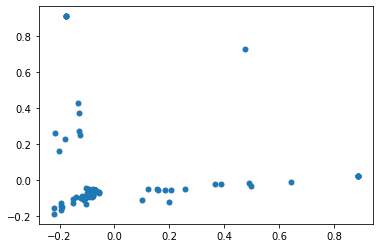

In [ ]:
data=pd.read_csv('s3://{}/{}/prediction_data.csv'.format(bucket,prefix),header=None)
pca = PCA(n_components=2)
new_data= pca.fit_transform(data)
plt.scatter(new_data[:, 0], new_data[:, 1], s=25, cmap='viridis')

This concludes our exercise. 